In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
from gensim.models import KeyedVectors
from gensim.models import KeyedVectors
import scipy
import cv2
from keras.applications.resnet50 import ResNet50
from google_images_download import google_images_download
from sklearn.manifold import TSNE

# Get list of nouns

In [9]:
nouns = set()
for synset in list(wn.all_synsets('n'))[:10]:

    n = synset.name().split('.')[0]

    if len(n) > 2 and n.isalpha():
        nouns.add(n)
        
print 'Numer of nouns:', len(nouns)

Numer of nouns: 8


# Create Word Vectors

In [15]:
resnet = ResNet50(weights='imagenet', 
                  include_top=False, 
                  pooling='avg')
embeddings = KeyedVectors(2048)
for word in nouns:
    response = google_images_download.googleimagesdownload()
    path = response.download({'keywords': word, 'limit': 1})[word][0]
    img = cv2.imread(path)
    img = scipy.misc.imresize(img, 224.0 / img.shape[0])
    img = img.reshape((1,) + img.shape)
    embeddings[word] = resnet.predict(img)[0]
    
print 'Vocabulary size:', len(embeddings.vocab)

Completed Image ====> 1. oops-concept-abstraction-793x397.jpg

Errors: 0

Completed Image ====> 1. screen_shot_2016-01-18_at_12.25.34_pm_109860.jpg

Errors: 0

Completed Image ====> 1. 1*0ttfuc9a8rmcqxcbrnemng.png

Errors: 0

Completed Image ====> 1. mv5byjizmzc4mgitytnkzi00zmyyltlhztgtyzqxyzewngy2nmuyxkeyxkfqcgdeqxvynzq5mzy0njm@._v1_uy268_cr2,0,182,268_al_.jpg

Errors: 0

Completed Image ====> 1. latest?cb=20150223191205.jpg

Errors: 0

Completed Image ====> 1. congener_levels.jpg

Errors: 0

Completed Image ====> 1. whole-clipart-1.jpg

Errors: 0

Completed Image ====> 1. starfishnoaa.jpg

Errors: 0

Vocabulary size: 8


In [16]:
labels, vectors = zip(*map(lambda v: (v, embeddings[v]), embeddings.vocab))
print '# labels:', len(labels), '# vectors:', len(vectors)

# labels: 8 # vectors: 8


In [21]:
tsne = TSNE(n_components=2, n_iter=1000, perplexity=3, metric='cosine', verbose=1)
transformed = tsne.fit_transform(vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 8 samples in 0.000s...
[t-SNE] Computed neighbors for 8 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 8 / 8
[t-SNE] Mean sigma: 0.209599
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.322514
[t-SNE] Error after 850 iterations: 0.130330


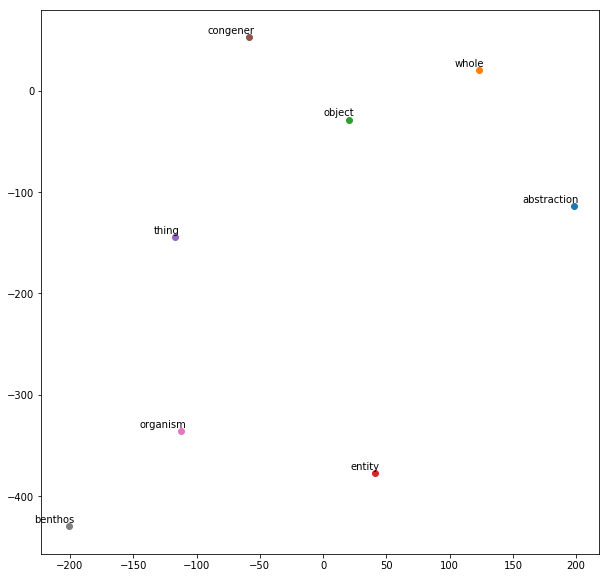

In [26]:
x = transformed[:,0]
y = transformed[:,1]

plt.figure(figsize=(10, 10)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

# Translate

In [32]:
def translate(word):
    response = google_images_download.googleimagesdownload()
    path = response.download({'keywords': word, 'limit': 1})[word][0]
    img = cv2.imread(path)
    img = scipy.misc.imresize(img, 224.0 / img.shape[0])
    vector = resnet.predict(img.reshape((1,) + img.shape))[0]
    return embeddings.most_similar([vector])[0][0]

In [34]:
translated = translate('ristorante')

Completed Image ====> 1. ristorante-a-mano.jpg

Errors: 0



In [35]:
print translated

entity
